In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression, Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
credit = pd.read_csv('dataset_31_credit-g.arff', skiprows = 301,index_col=False);
credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [3]:
len(credit.columns)

21

In [4]:
credit.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [5]:
credit.checking_status.unique()

array(["'<0'", "'0<=X<200'", "'no checking'", "'>=200'"], dtype=object)

In [6]:
discrete = ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','employment',
           'other_payment_plans','property_magnitude','housing','job','own_telephone','foreign_worker']
continous = ['duration','credit_amount','installment_commitment','num_dependents','residence_since',
            'age','existing_credits']

In [7]:
def convertDis(data):
    for i in data:
        value = credit[str(i)].unique().tolist()
        
        
convertDis(discrete)

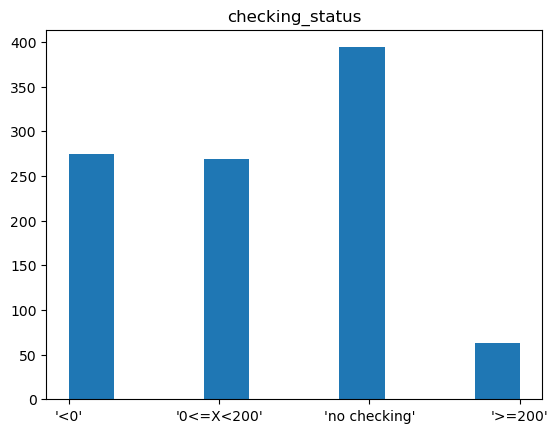

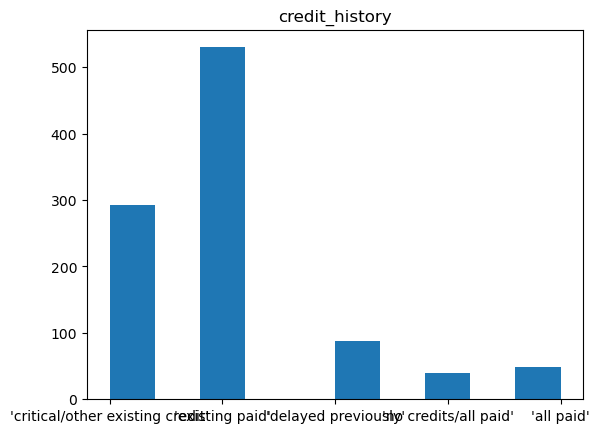

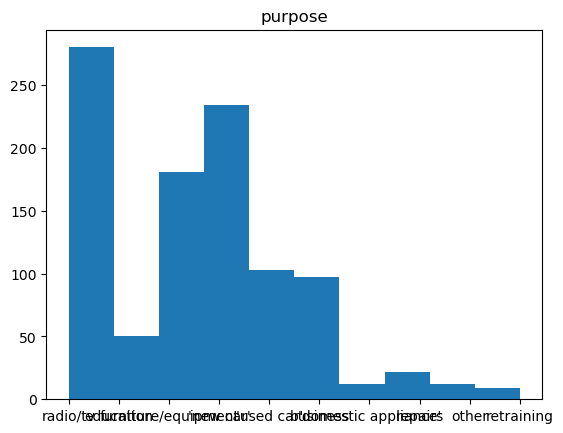

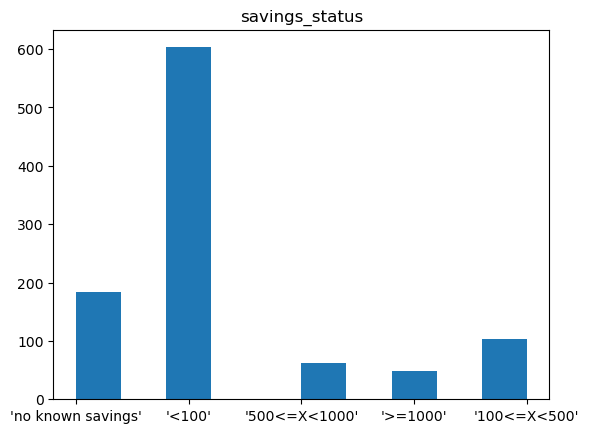

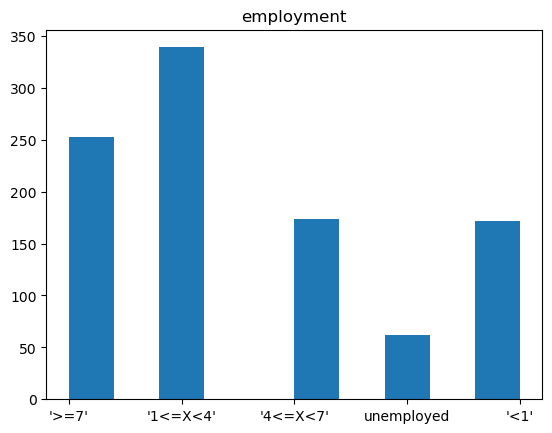

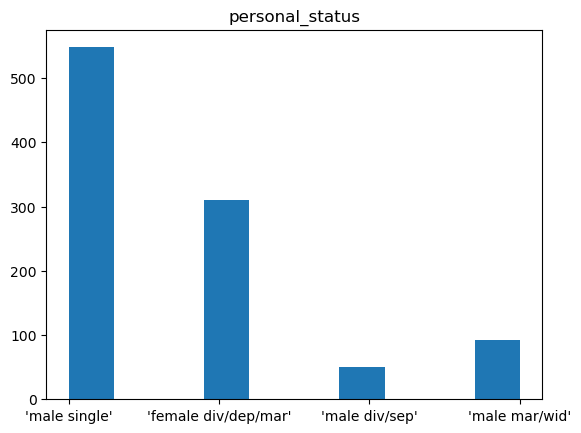

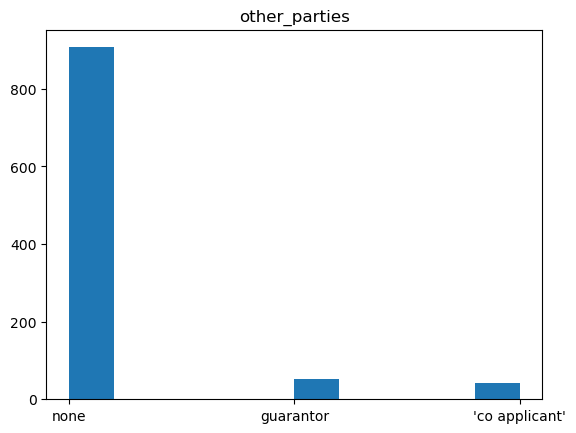

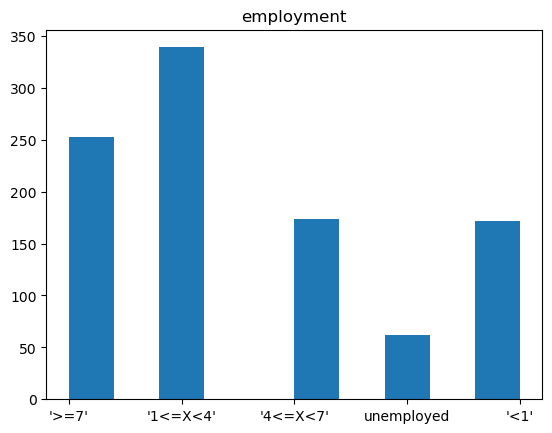

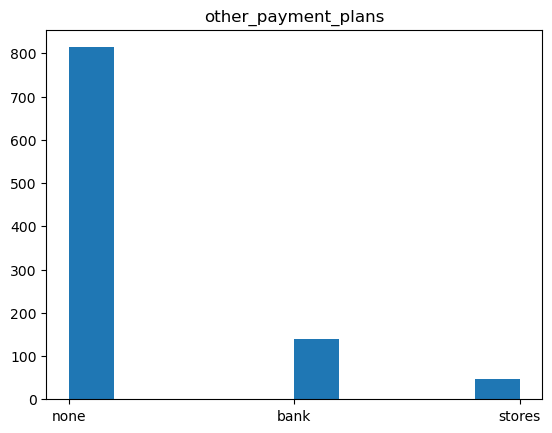

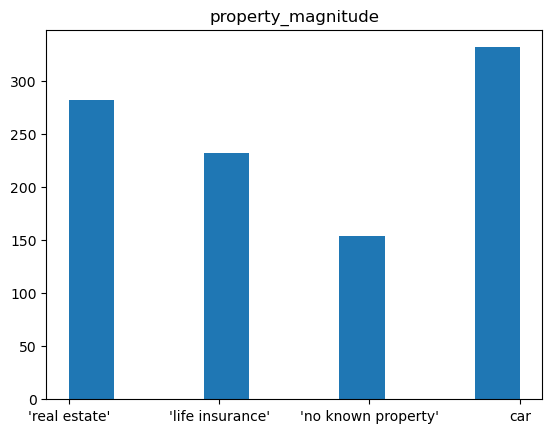

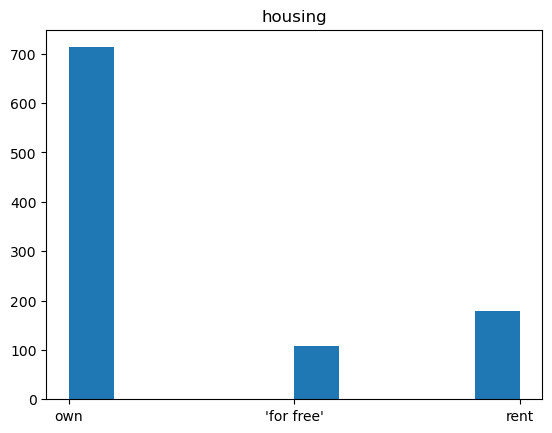

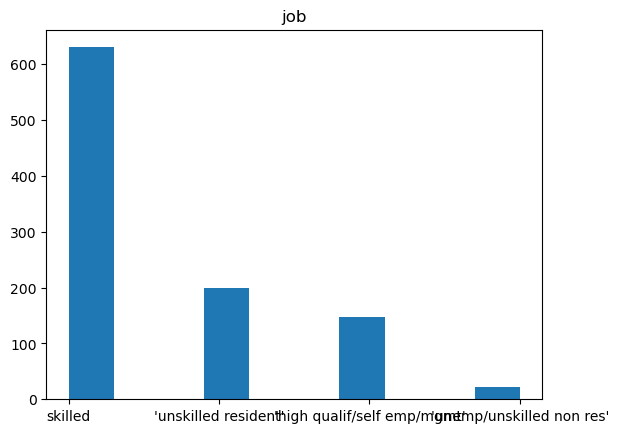

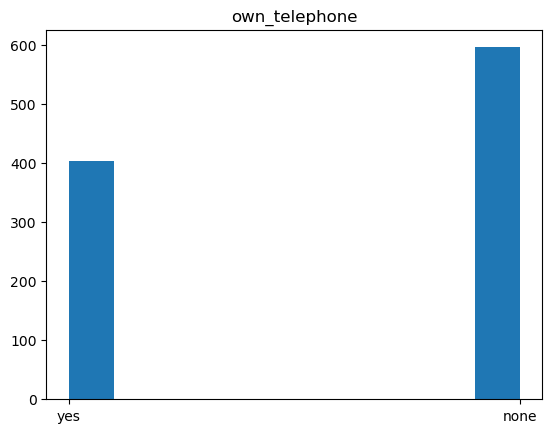

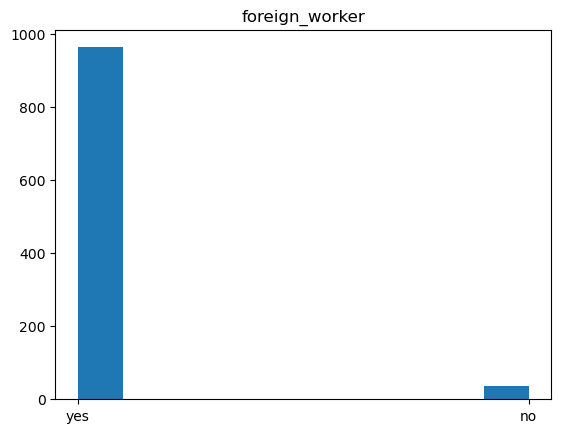

In [8]:
for i in discrete:
    plt.title(i)
    plt.hist(credit[i])
    plt.show()

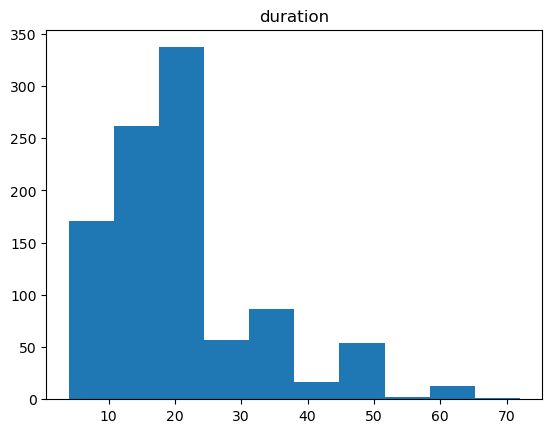

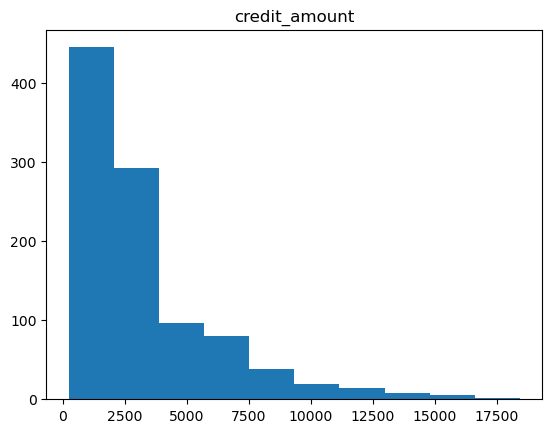

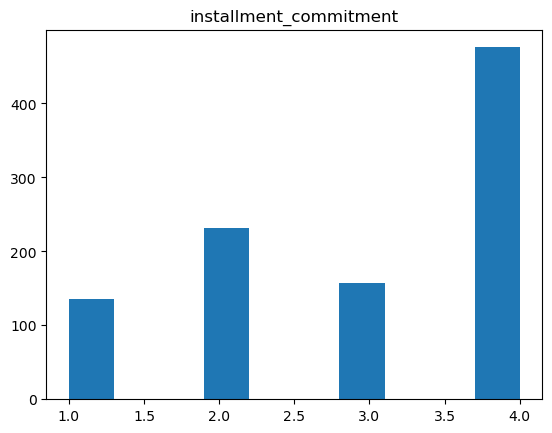

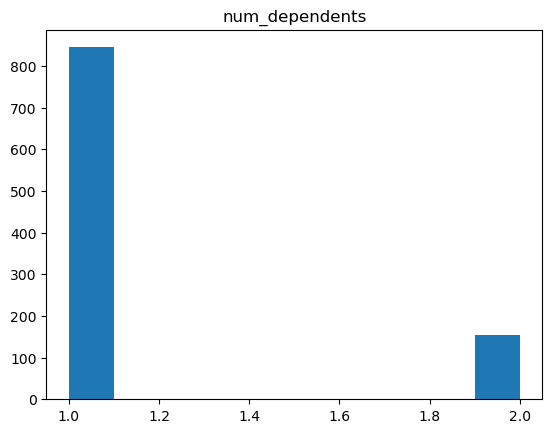

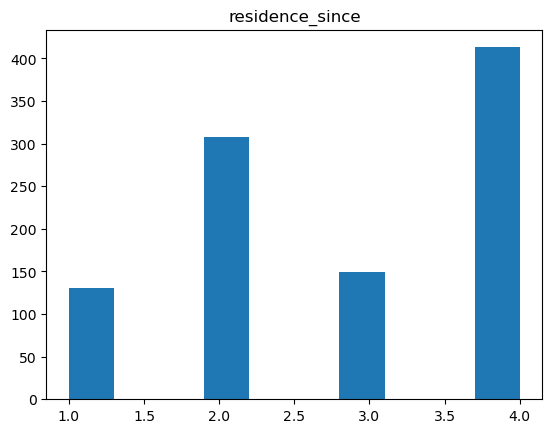

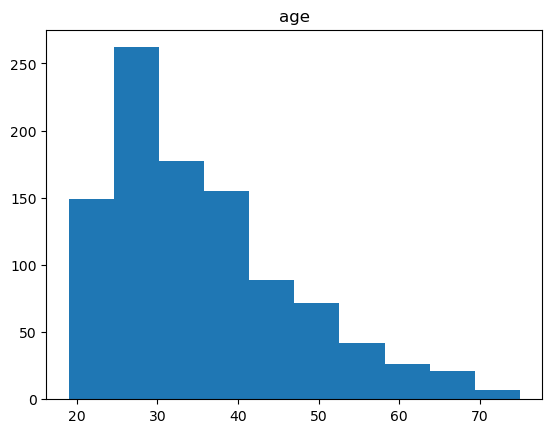

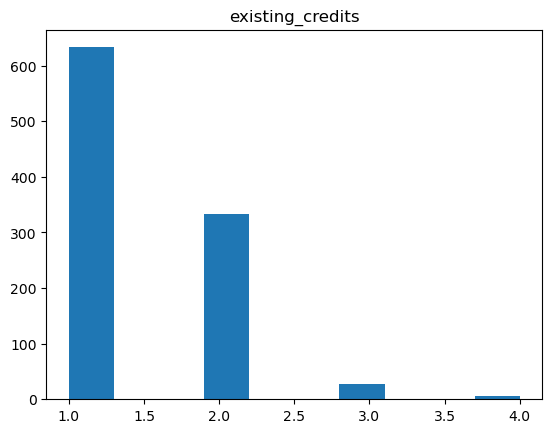

In [9]:
for i in continous:
    plt.title(i)
    plt.hist(credit[i])
    plt.show()

In [10]:
x = credit.drop(columns = "class")
y = credit["class"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [11]:
label_encoder = LabelEncoder()
for i in discrete:
    X_train[i] = label_encoder.fit_transform(X_train[i])
    X_test[i] = label_encoder.fit_transform(X_test[i])

In [12]:
logistic = LogisticRegression(max_iter = 500)
logistic.fit(X_train, y_train)
logistic.score(X_test, y_test)

0.775

In [13]:
x = credit.drop(columns = "class")
y = credit["class"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [14]:
label_encoder = LabelEncoder()
for i in discrete:
    X_train[i] = label_encoder.fit_transform(X_train[i])
    X_test[i] = label_encoder.fit_transform(X_test[i])

In [15]:
models = {
    "logistic" : LogisticRegression(),
    "SVM" : SVC(),
    "KNN" : KNeighborsClassifier()
}

In [16]:
results = {}
for i in models:
    pipe = make_pipeline(StandardScaler(), models[i])
    results[i] = cross_val_score(pipe, X_train, y_train, n_jobs = -1, cv = 3).mean()
print(results)

{'logistic': 0.721213145222607, 'SVM': 0.7162381609454348, 'KNN': 0.7000319149934762}


In [17]:
models = {'logistic': LogisticRegression(max_iter = 5000), 
          'SVC': SVC(), 
          'KNN': KNeighborsClassifier()}

params = {'logistic': {'C': np.arange(0, 1.0, 0.2)},
          'SVC': {'C': np.arange(0, 1.0, 0.2), 
                  'kernel': ('linear', 'rbf')}, 
          'KNN': {'n_neighbors': np.arange(3, 5, 1)}}

In [18]:
results_dict = {}
for i in models:
    results_dict[i] = GridSearchCV(models[i], params[i], n_jobs = -1).fit(X_test, y_test).best_score_
print(results_dict)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1589, in fit
    fold_coefs_ = Parallel(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ADMIN\anaconda3\lib\site-

{'logistic': 0.75, 'SVC': 0.72, 'KNN': 0.6900000000000001}


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx",

In [19]:
models = {'Logistic': LogisticRegression(), 
          'SVC': SVC(), 
          'KNN': KNeighborsClassifier()}

In [20]:
k_results = {}
for i in models:
    pipe = make_pipeline(StandardScaler(), models[i])
    kf =  KFold(shuffle = True)
    k_results[i] = cross_val_score(pipe, X_train, y_train, n_jobs = -1, cv = kf).mean()
print(k_results)

{'Logistic': 0.7050000000000001, 'SVC': 0.7324999999999999, 'KNN': 0.70125}


In [21]:
models = {'LogisticRegression': LogisticRegression(), 
          'SVC': SVC(kernel='linear')}

In [22]:
for i in models:
    pipe = make_pipeline(StandardScaler(), models[i])
    pipe.fit(X_train, y_train)
    lr_coefs = pd.DataFrame(data = pipe[1].coef_.flatten(), index=X_train.columns, columns=[i])
    lr_coefs.sort_values(by = i)
    print(lr_coefs[:20])

                        LogisticRegression
checking_status                   0.628940
duration                         -0.333095
credit_history                   -0.166344
purpose                           0.251293
credit_amount                    -0.149939
savings_status                    0.259389
employment                        0.019849
installment_commitment           -0.323629
personal_status                   0.237090
other_parties                     0.011924
residence_since                   0.014027
property_magnitude                0.068468
age                               0.169643
other_payment_plans               0.000273
housing                          -0.068765
existing_credits                  0.015744
job                               0.095696
num_dependents                   -0.094085
own_telephone                     0.161734
foreign_worker                   -0.188828
                             SVC
checking_status         0.308440
duration               -0.23996

# TASK 2

In [23]:
house = pd.read_csv('data.csv')
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [24]:
for i in house.columns:
    print(i,house[i].nunique())

date 70
price 1741
bedrooms 10
bathrooms 26
sqft_living 566
sqft_lot 3113
floors 6
waterfront 2
view 5
condition 5
sqft_above 511
sqft_basement 207
yr_built 115
yr_renovated 60
street 4525
city 44
statezip 77
country 1


In [25]:
continous = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','sqft_above','sqft_basement']
categorical = ['date','waterfront','yr_built','yr_renovated','city','statezip']
drop = ['country','street']

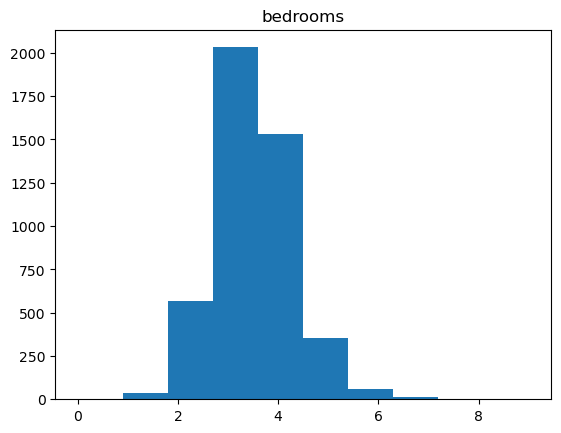

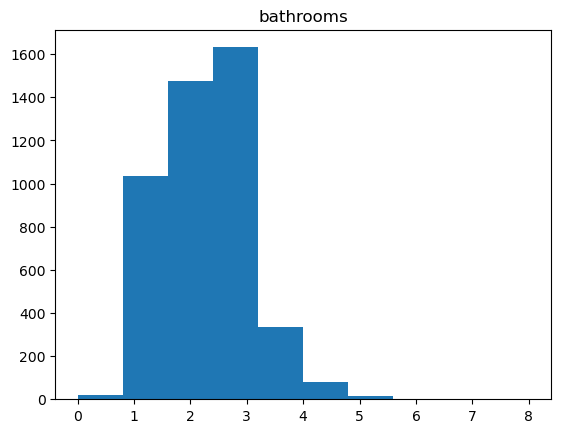

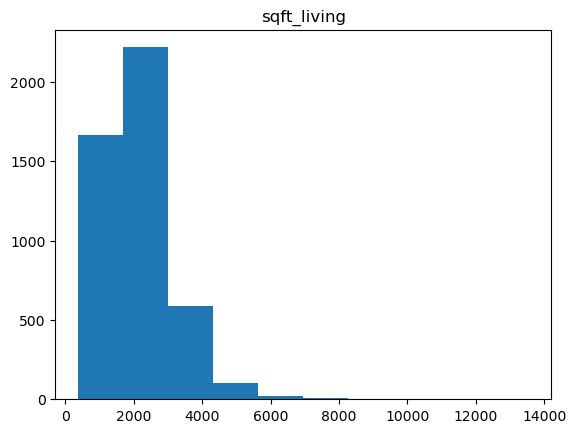

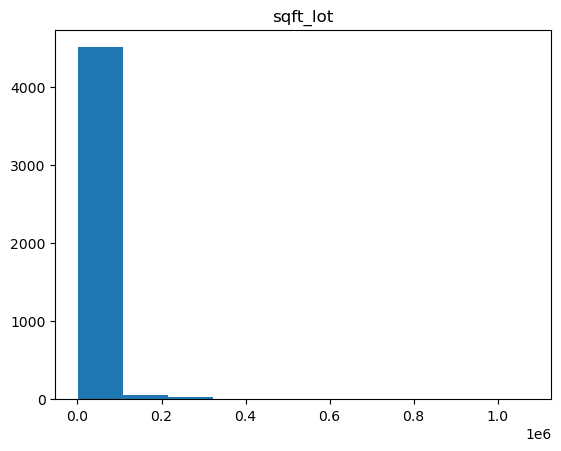

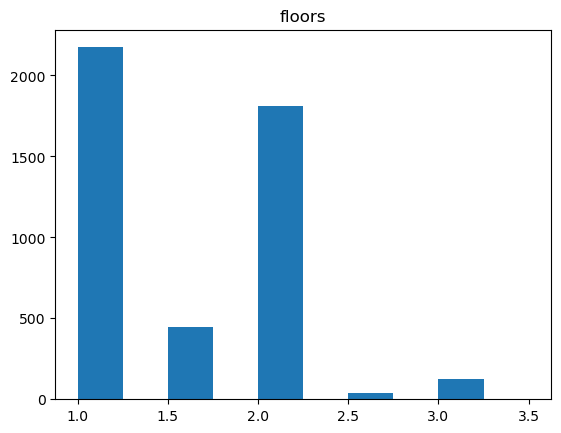

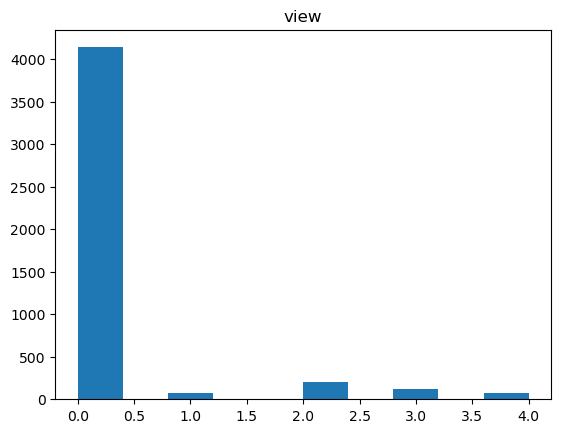

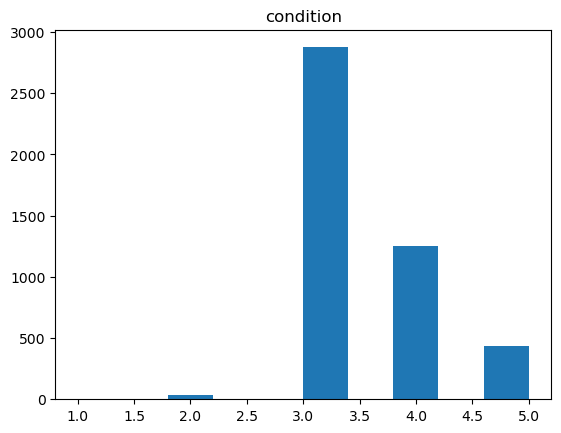

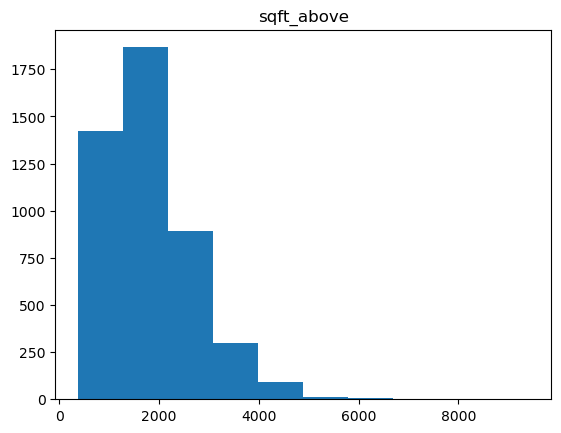

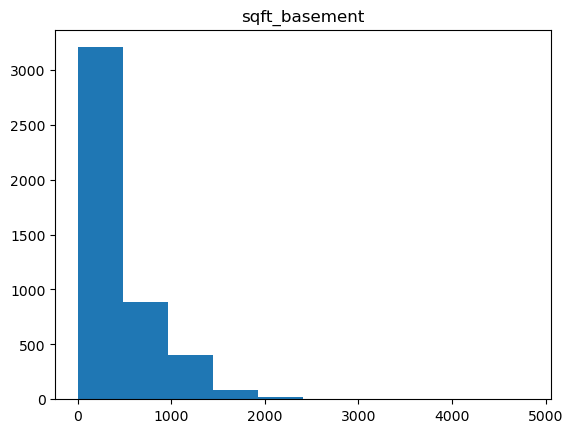

In [26]:
for i in continous:
    plt.hist(house[i])
    plt.title(i)
    plt.show()

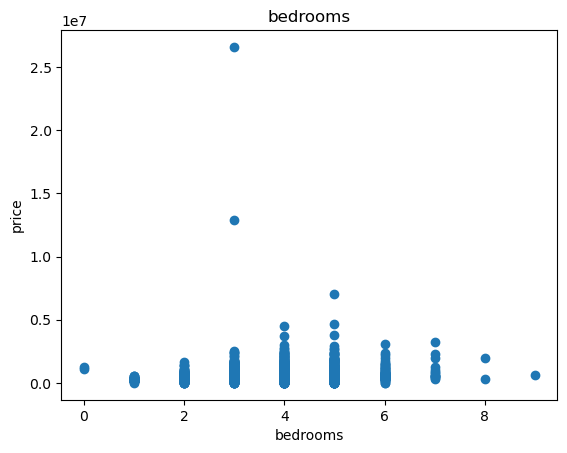

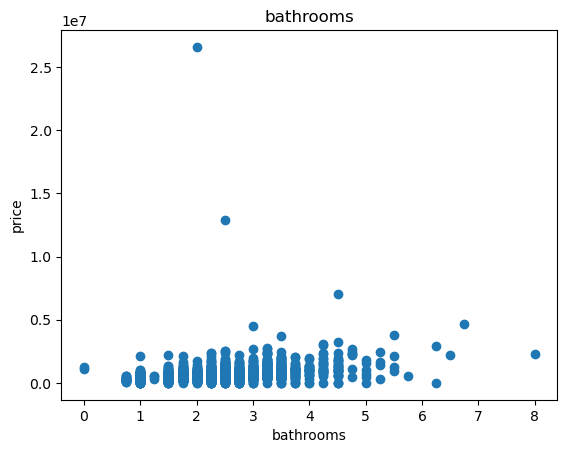

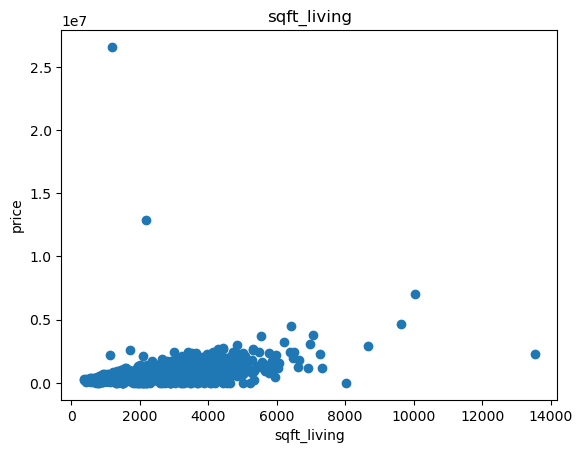

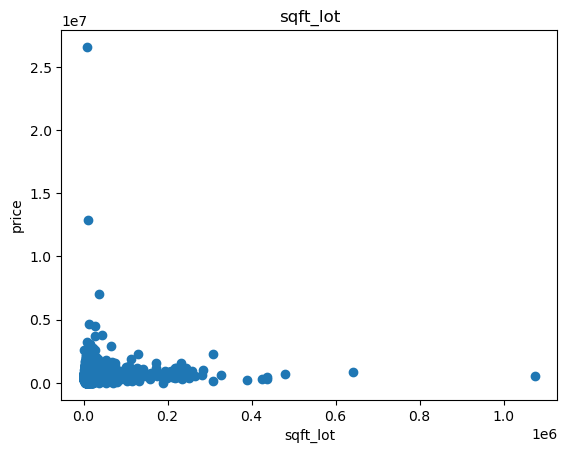

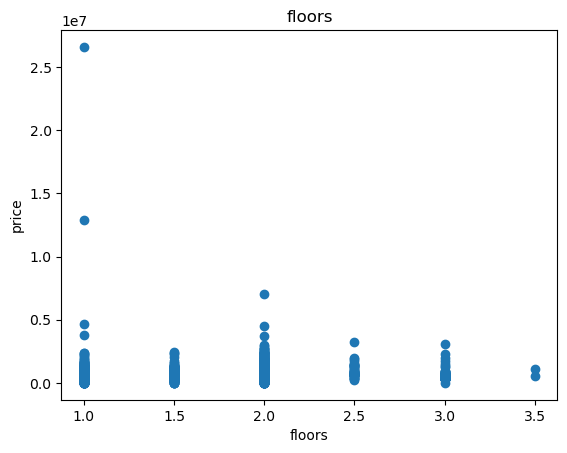

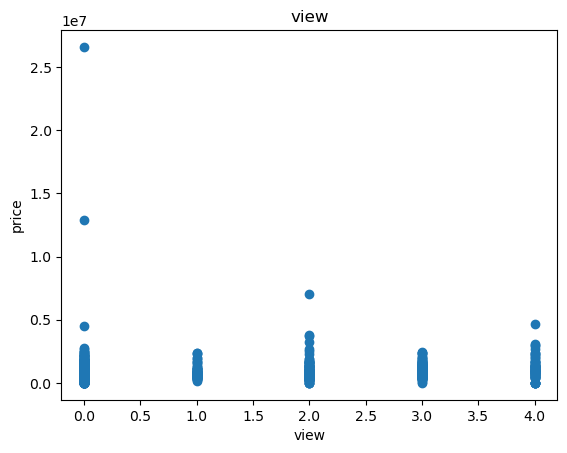

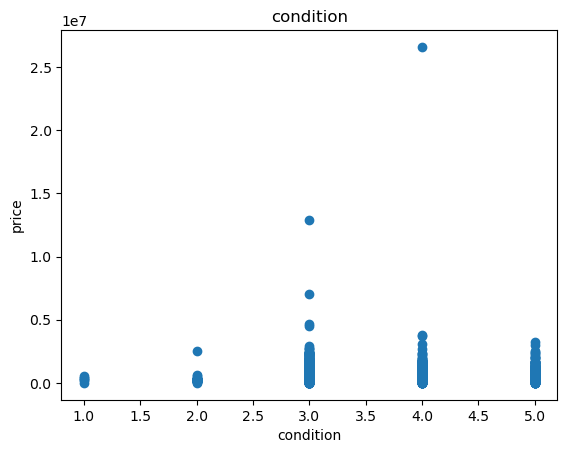

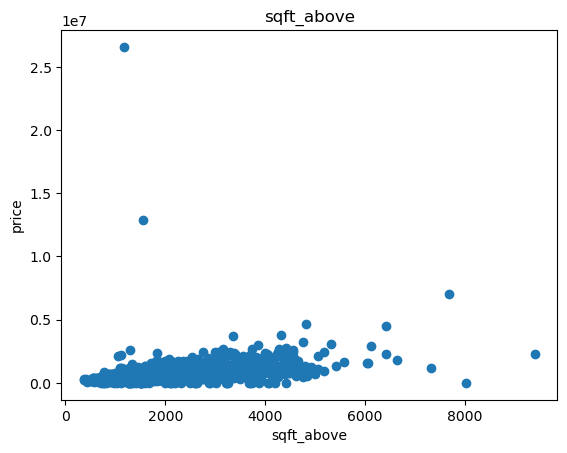

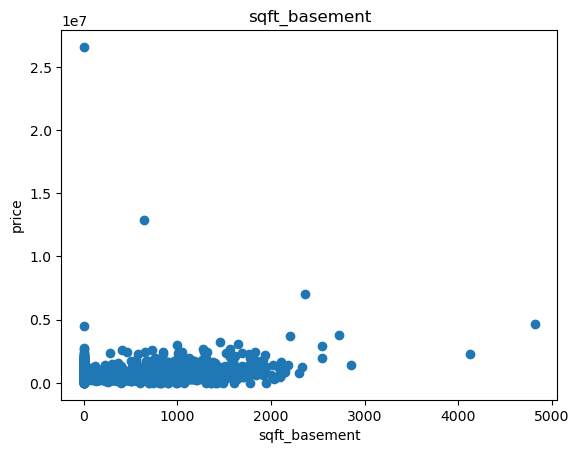

In [27]:
for i in continous:
    plt.scatter(x = house[i], y = house['price'])
    plt.xlabel(i)
    plt.ylabel('price')
    plt.title(i)
    plt.show()

In [28]:
house[categorical] = house[categorical].apply(LabelEncoder().fit_transform)
house.drop(columns = drop, inplace = True)

In [29]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,55,50,36,62
1,0,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,21,0,35,58
2,0,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,66,0,18,26
3,0,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,63,0,3,7
4,0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,76,37,31,31


In [30]:
X = house.drop(columns = 'price')
y = house.price
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)

In [31]:
X_train_col = X_train

In [32]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [33]:
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=50000),
    'ElisticNet': ElasticNet()
}

In [34]:
cross_result = {}
for i in models:
    cross_result[i] = cross_val_score(estimator = models[i], X = X_train, y = y_train).mean()
print(cross_result)

{'Linear': 0.3441916941363667, 'Ridge': 0.34418435114492985, 'Lasso': 0.3441832989795642, 'ElisticNet': 0.3227250364117581}


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.223e+12, tolerance: 1.243e+11
  model = cd_fast.enet_coordinate_descent(


In [35]:
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=50000),
    'ElisticNet': ElasticNet()
}

In [36]:
params = {
    'Ridge': {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]},
    'Lasso': {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]},
    'ElisticNet': {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
}

In [37]:
best_params = {}
for i in models:
    best_params[i] = GridSearchCV(estimator = models[i], param_grid = params[i], n_jobs = -1).fit(X_train, y_train).best_estimator_

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.523e+13, tolerance: 1.333e+11
  model = cd_fast.enet_coordinate_descent(


In [38]:
print(best_params)

{'Ridge': Ridge(alpha=200), 'Lasso': Lasso(alpha=0.026, max_iter=50000), 'ElisticNet': ElasticNet(alpha=0.02)}


In [39]:
models = {
    'Ridge': Ridge(alpha=200),
    'Lasso': Lasso(alpha=0.03, max_iter=100000),
    'ElisticNet': ElasticNet(alpha=0.02)
}

In [40]:
best_score = {}
for i in models:
    model = models[i]
    model.fit(X_train, y_train)
    best_score[i] = model.score(X_test, y_test)

print(best_score)

{'Ridge': 0.5406857026123126, 'Lasso': 0.5443677941185239, 'ElisticNet': 0.5436696718876607}


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.523e+13, tolerance: 1.333e+11
  model = cd_fast.enet_coordinate_descent(


In [41]:
coef_df = pd.DataFrame(data = {'Columns_name': X_train_col.columns})

In [42]:
for i in models:
    pipe = models[i]
    pipe.fit(X_train, y_train)
    coef_df = pd.concat([coef_df, pd.DataFrame(data = {i: pipe.coef_})], axis=1)
print(coef_df)

     Columns_name          Ridge          Lasso     ElisticNet
0            date    9564.953661    9658.516817    9646.089614
1        bedrooms  -39555.126736  -49022.146343  -47103.035011
2       bathrooms   44600.611136   44625.328974   44637.166721
3     sqft_living  114911.798861  247628.209944  120833.444015
4        sqft_lot  -20524.907106  -24112.347897  -23388.991667
5          floors   18190.287102   18266.847450   18256.296647
6      waterfront   31033.430495   31356.028985   31306.004879
7            view   35558.324657   34336.071058   34603.579807
8       condition   25445.097961   26024.658984   25938.247198
9      sqft_above  103457.145415   -1178.023071  109168.579774
10  sqft_basement   47185.412482  -10789.651210   48909.697305
11       yr_built  -58492.483962  -65366.399140  -63978.376508
12   yr_renovated    9886.765937   10297.343707   10233.768136
13           city   33080.189177   36759.677884   36002.743920
14       statezip  -22020.369669  -26656.155291  -25686

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.523e+13, tolerance: 1.333e+11
  model = cd_fast.enet_coordinate_descent(
